# Analyze target statistics

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)
from pathlib import Path
# fig_dir = Path('../../fig')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 15

In [2]:
# Read target csv
df = pd.read_csv('../../../data/interim/target_list.csv', index_col=0)
df

,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2
0,6VI2_B,1.150,2020-09-02T00:00:00Z,>6vi2_B mol:protein length:243 FAB4 heavy chain,ECEISEVQLVESGGGLVQPGGSLRLSCAASGFNFYSSYIHWVRQAP...,243,14576,1949,True
1,6ES8_A,1.900,2018-08-15T00:00:00Z,>6es8_A mol:protein length:219 Gag protein,PIVQNLQGQMVHQCISPRTLNAWVKVVEEKAFSPEVIPMFSALSCG...,219,3333,29,True
2,6S8K_A,1.520,2019-11-27T00:00:00Z,>6s8k_A mol:protein length:437 Tubulin alpha-...,MRECISIHVGQAGVQIGNACWELYCLEHGIQPDGQMPSDKTIGGGD...,437,2512,330,True
3,6CNW_A,0.920,2018-11-14T00:00:00Z,>6cnw_A mol:protein length:116 humanized anti...,EVQLVESGGGLVQPGGSLRLSCAASGFTFSTSWMYWLRQAPGKGLE...,116,2423,383,True
4,6Y26_B,1.200,2020-12-23T00:00:00Z,>6y26_B mol:protein length:100 Beta-2-microgl...,MIQRTPKIQVYSRHPAENGKSNFLNCYVSGFHPSDIEVDLLKNGER...,100,2057,357,True
...,...,...,...,...,...,...,...,...,...
5933,7KV4_AAA,1.840,2021-02-17T00:00:00Z,>7kv4_AAA mol:protein length:510 SusD family ...,MKKYKIFTIAALLSSALVTTSCGDDFLTANSTEKPMAGAPATEGTI...,510,1,1,False
5934,6YQQ_A,2.500,2020-05-20T00:00:00Z,>6yqq_A mol:protein length:341 ForT-PRPP complex,MALDRPDRSGAVRVSAPARLSFTLISLDGSSLRRNGIAAMAVDRPG...,341,1,1,False
5935,7RT0_A,1.800,2021-08-25T00:00:00Z,>7rt0_A mol:protein length:421 4-methylaminob...,MGRIGILGAGLAGLAAATKLAEAGENVTVFEARNRPGGRVWSETLD...,421,1,1,False
5936,6Q64_A,2.400,2019-05-08T00:00:00Z,>6q64_A mol:protein length:364 Endoglycosidase,MKLLKYLCIGISALSILSCSDWTSEEREVFENQEGMHRLIPLIEAQ...,364,1,1,False


In [3]:
df['is_similar_AF2'] = ['True' if x == True else 'False' for x in df['is_similar_AF2']]

In [4]:
# Number of sequences included in the AF2 training data in the cluster
df['num_sequence_in_cluster_included_AF2'] = df['num_entry_in_cluster'] - df['num_entry_in_cluster_AF2_notInclude']

## Show target distribution

<AxesSubplot:xlabel='length'>

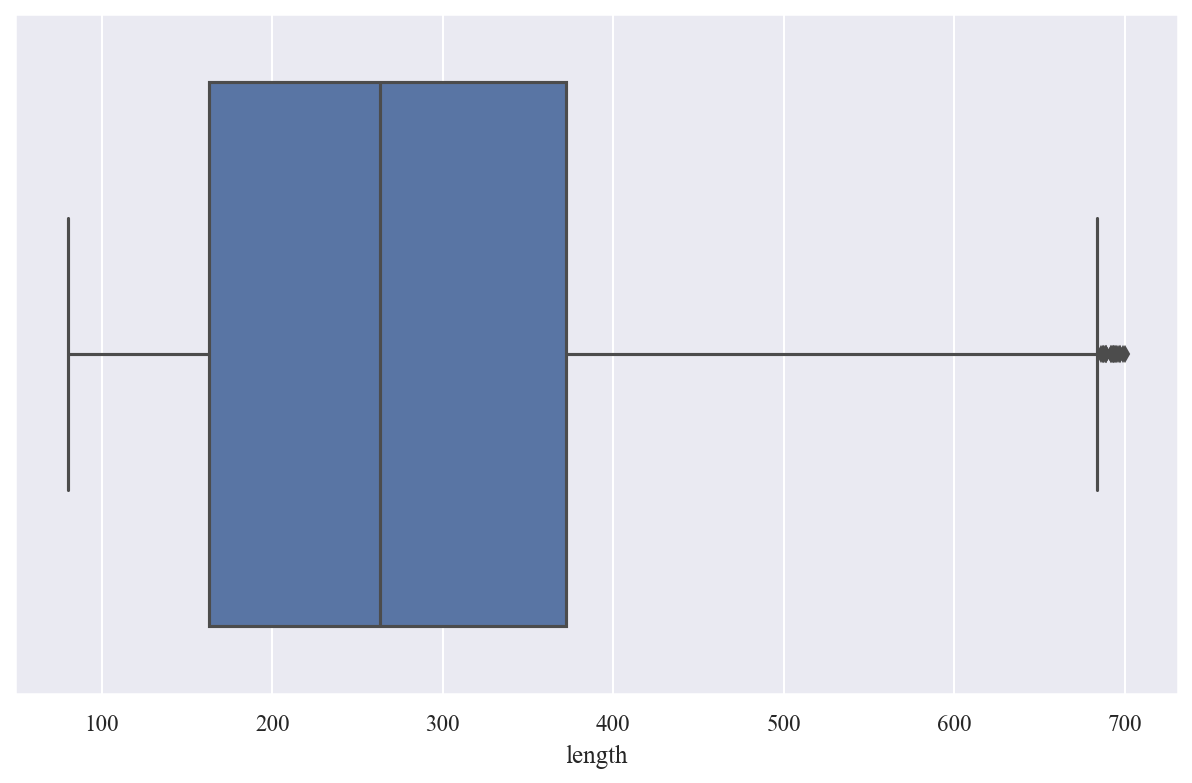

In [5]:
# Sequence length
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='length')

<AxesSubplot:xlabel='length', ylabel='is_similar_AF2'>

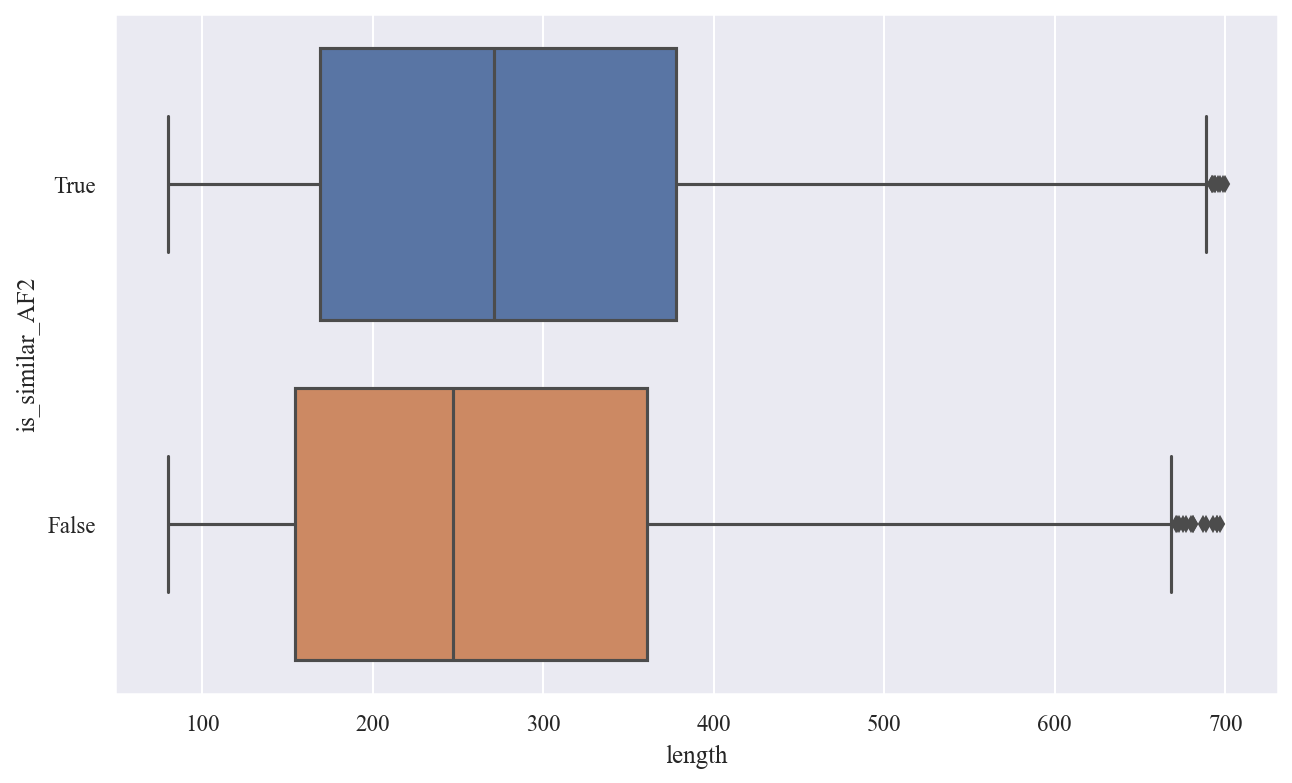

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='length', y='is_similar_AF2')

<AxesSubplot:xlabel='resolution'>

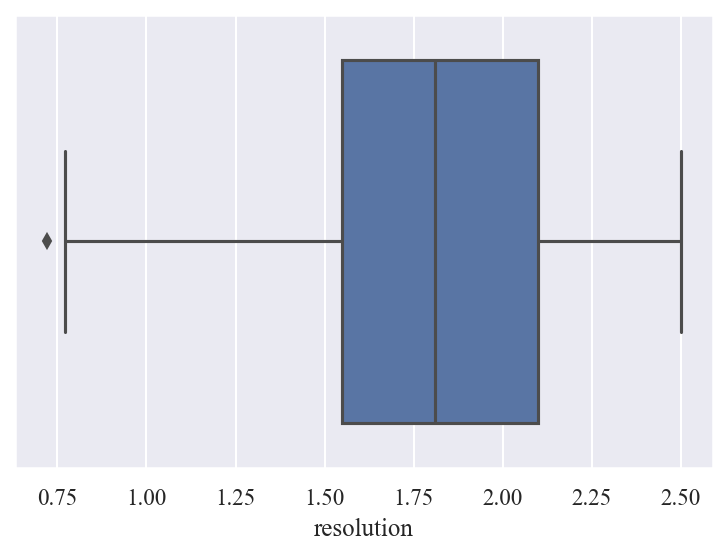

In [7]:
# Resolution
sns.boxplot(data=df, x='resolution')

<AxesSubplot:xlabel='resolution', ylabel='is_similar_AF2'>

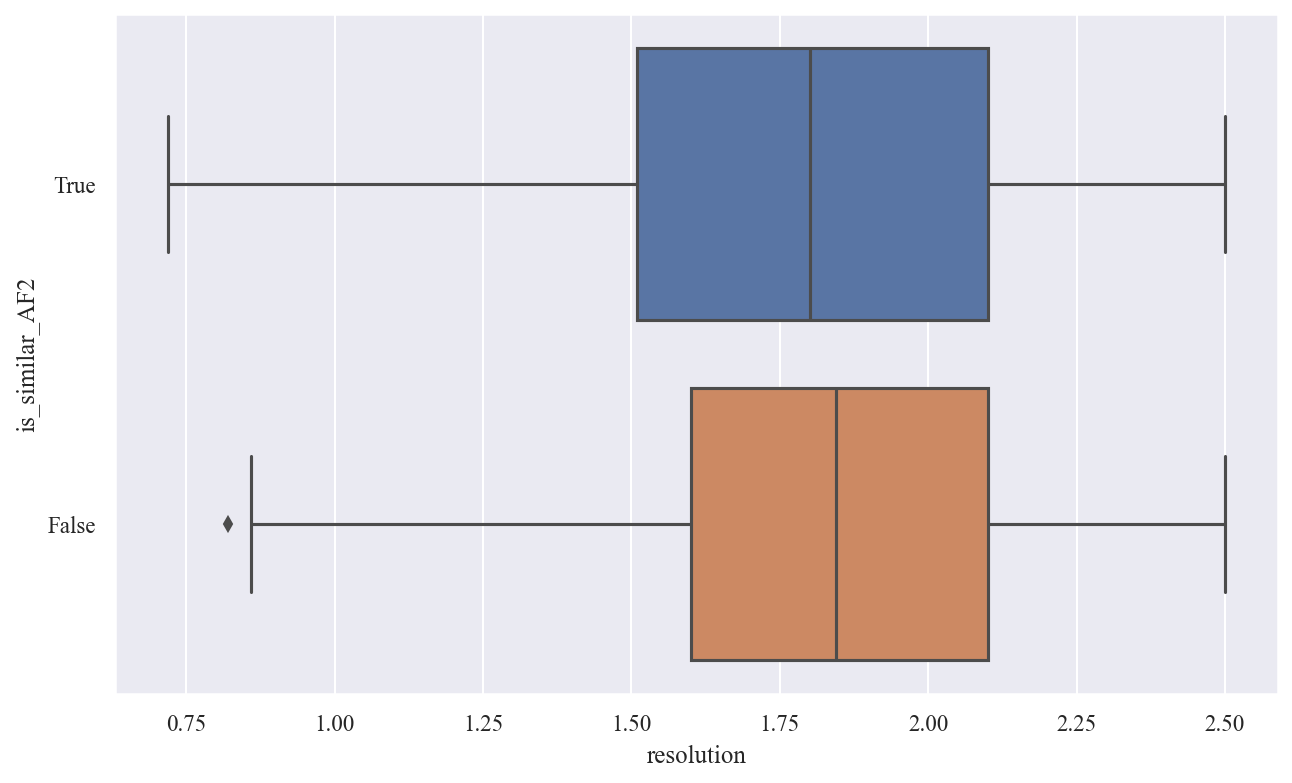

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='resolution', y='is_similar_AF2')

<AxesSubplot:xlabel='is_similar_AF2', ylabel='count'>

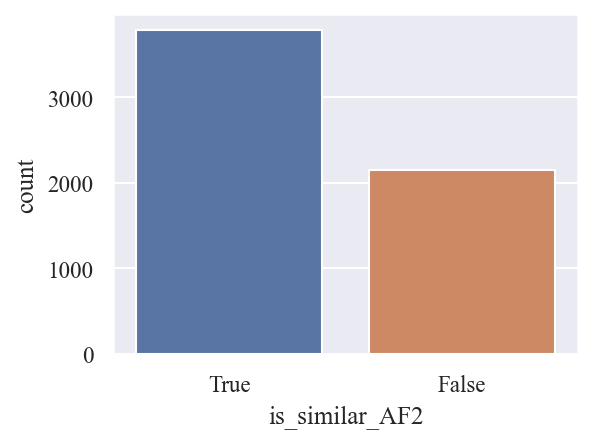

In [9]:
# Target number that have similar sequence to AF2 training dataset and not
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x='is_similar_AF2')

/Users/TAKEI/miniforge3/envs/mypython/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_entry_in_cluster'>

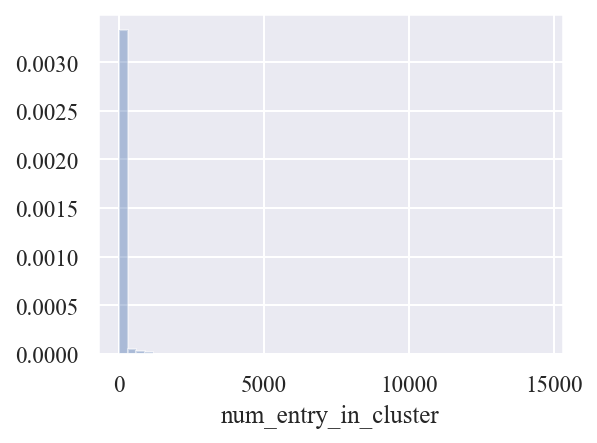

In [10]:
plt.figure(figsize=(4, 3))
sns.distplot(df['num_entry_in_cluster'], kde=False, norm_hist=True)

<AxesSubplot:xlabel='num_sequence_in_cluster_included_AF2'>

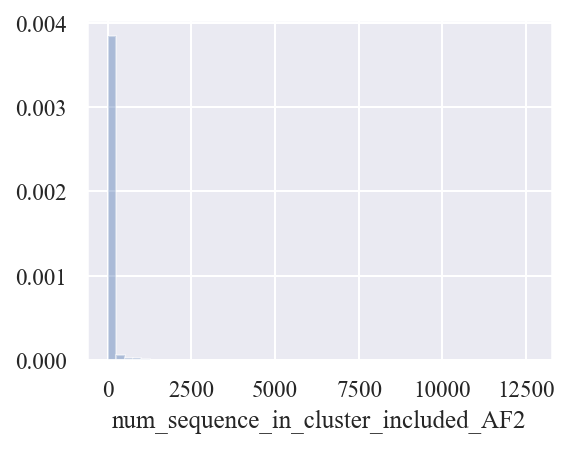

In [11]:
plt.figure(figsize=(4, 3))
sns.distplot(df['num_sequence_in_cluster_included_AF2'], kde=False, norm_hist=True)

## Sampling targets

In [12]:
df['is_similar_AF2'].value_counts()

True     3783
False    2155
Name: is_similar_AF2, dtype: int64

In [13]:
similar_df = df[df['is_similar_AF2'] == 'True']
non_similar_df = df[df['is_similar_AF2'] == 'False']

In [14]:
random_state = 0
target_num = 100
df_sample = df.sample(target_num, random_state=random_state)
display(df_sample)
df_sample['is_similar_AF2'].value_counts()

,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2,num_sequence_in_cluster_included_AF2
3176,7KLD_A,2.250,2021-09-01T00:00:00Z,>7kld_A mol:protein length:106 Phage-related ...,MITVDITVNDEGKVTDVIMDGHADHGEYGHDIVCAGASAVLFGSVN...,106,7,5,True,2
5463,6IF6_A,1.900,2019-05-01T00:00:00Z,>6if6_A mol:protein length:133 Protein SflA,HMSQAPNDPIEQYEYAQQLLASNKAEASPDTRYWLEQSANQGYLPA...,133,1,1,False,0
2909,6S0M_A,2.000,2019-08-28T00:00:00Z,>6s0m_A mol:protein length:168 3'-5' exoribon...,MRYFYDTEFIEDGHTIELISIGVVAEDGREYYAVSTEFDPERAGSW...,168,8,2,True,6
3601,6U18_A,2.000,2020-08-19T00:00:00Z,>6u18_A mol:protein length:194 Erythromycin r...,MPRPKLKSDDEVLEAATVVLKRCGPIEFTLSGVAKEVGLSRAALIQ...,194,6,2,True,4
1771,6JMS_A,1.500,2020-05-06T00:00:00Z,>6jms_A mol:protein length:327 Pollen allerge...,MHHHHHHEQIGVNYGMDGNNLPSAGDVVSLMKKNNIGKMRIFGPNA...,327,21,1,True,20
...,...,...,...,...,...,...,...,...,...,...
2475,7JQY_A,2.150,2021-03-17T00:00:00Z,>7jqy_A mol:protein length:309 Cif-like 1,MQNERSEQSMPGMPAPGLPAGFERRFSRRYAQLDDVRLHYVTGGPD...,309,12,12,False,0
4100,5ZUU_C,1.950,2019-05-15T00:00:00Z,>5zuu_C mol:protein length:180 30-kDa cleavag...,PADQTNRTSHPLPQGVNRYFVVKSNNRENFELSVQQGVWATQRSNE...,180,4,4,False,0
735,6UUG_A,1.685,2019-12-04T00:00:00Z,>6uug_A mol:protein length:415 Putative dehyd...,MGSSHHHHHHSSGLVPRGSHMTAKPQSTLLSPLQTARQLAAEFALT...,415,64,4,True,60
1865,5YLY_A,1.760,2018-05-23T00:00:00Z,>5yly_A mol:protein length:292 Nitrate reductase,GAMDAAVVVMPGTAAAPLPAIDVDAPFLNPKKQKAAELKEKIKISH...,292,19,2,True,17


True     68
False    32
Name: is_similar_AF2, dtype: int64

<AxesSubplot:xlabel='length'>

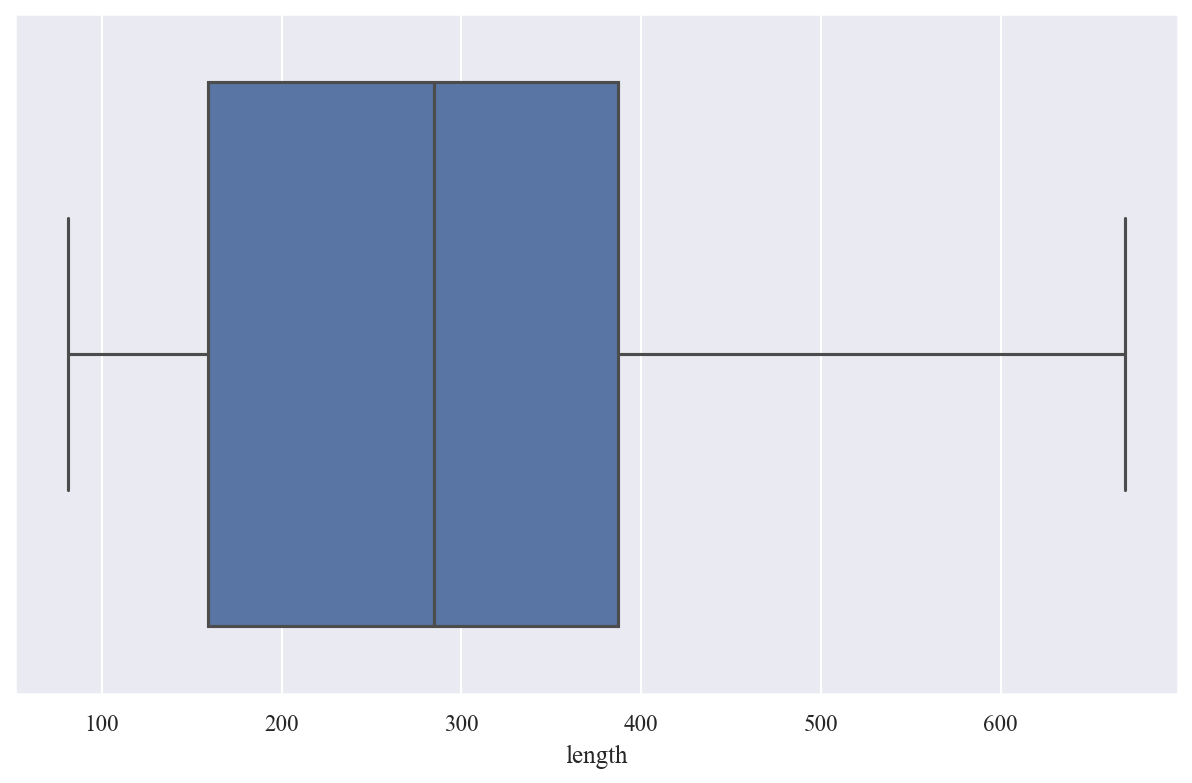

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sample, x='length')

/Users/TAKEI/miniforge3/envs/mypython/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_entry_in_cluster'>

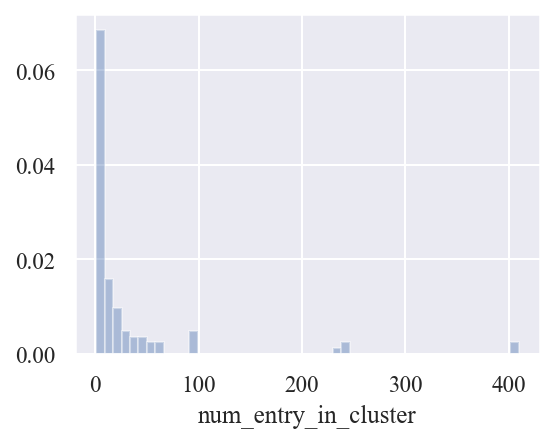

In [16]:
plt.figure(figsize=(4, 3))
sns.distplot(df_sample['num_entry_in_cluster'], kde=False, norm_hist=True)

In [17]:
# Equalize the number of targets that have similar sequence to AF2 training data and have not.
similar_sample = similar_df.sample(target_num // 2, random_state=random_state)
non_similar_sample = non_similar_df.sample(target_num // 2, random_state=random_state)
df_eq_sample = pd.concat([similar_sample, non_similar_sample])
df_eq_sample

,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2,num_sequence_in_cluster_included_AF2
538,7DW4_A,1.570,2021-08-04T00:00:00Z,>7dw4_A mol:protein length:235 Glutathione S-...,HHHHHHMAKSDVKLLGAWPSPFVMRPRIALNIKSVEYEFLEETLGS...,235,89,13,True,76
526,6DHP_o,2.040,2018-11-21T00:00:00Z,>6dhp_o mol:protein length:244 Photosystem II...,QTLTYDDIVGTGLANKCPTLDDTARGAYPIDSSQTYRIARLCLQPT...,244,91,34,True,57
2926,6UVQ_A,1.840,2020-11-25T00:00:00Z,>6uvq_A mol:protein length:268 D-glucose O-me...,MTDISQMYDQLSDPFAGLGAGNIHLGYFDGPDDAATLAEAADRLTD...,268,8,3,True,5
3868,6BNZ_A,1.450,2018-11-21T00:00:00Z,>6bnz_A mol:protein length:296 Lactoylglutath...,GSHMASMATGSEASKAAEAVVDWHKHDSKRMLHAVYRVGDLDRTIK...,296,4,3,True,1
776,5OJL_A,1.560,2018-05-30T00:00:00Z,>5ojl_A mol:protein length:298 Imine reductase,MATTTTTTKLTIFGLGAMGTAMATQFLKQGHTPTVWNRTAAKANPL...,298,61,29,True,32
...,...,...,...,...,...,...,...,...,...,...
3680,6JY5_D,2.150,2019-06-26T00:00:00Z,>6jy5_D mol:protein length:85 Unidentified ca...,MEVMRVRSDLIATRRIPGLKNISLRVMEDATGKVSVACDPIGVPEG...,85,5,5,False,0
5695,6XHZ_A,1.250,2021-01-20T00:00:00Z,>6xhz_A mol:protein length:216 N4: hypothetic...,MAPTAVRGGNVLFSASGRCTVGFNATKGGTYYAIMEGRCVGGARDW...,216,1,1,False,0
4484,6R5W_A,1.700,2019-10-30T00:00:00Z,>6r5w_A mol:protein length:173 Gp15 protein,NPAQFAQKTVLDEHVNDADIHVTATDKTNWNAKETVEGAQAKADKA...,173,3,3,False,0
3594,6XN2_A,1.652,2020-12-02T00:00:00Z,>6xn2_A mol:protein length:364 Xylosidase,MGSSHHHHHHSSGLVPRGSHMSDELQAASLQALARTAISAPLVTHL...,364,6,6,False,0


<AxesSubplot:xlabel='length'>

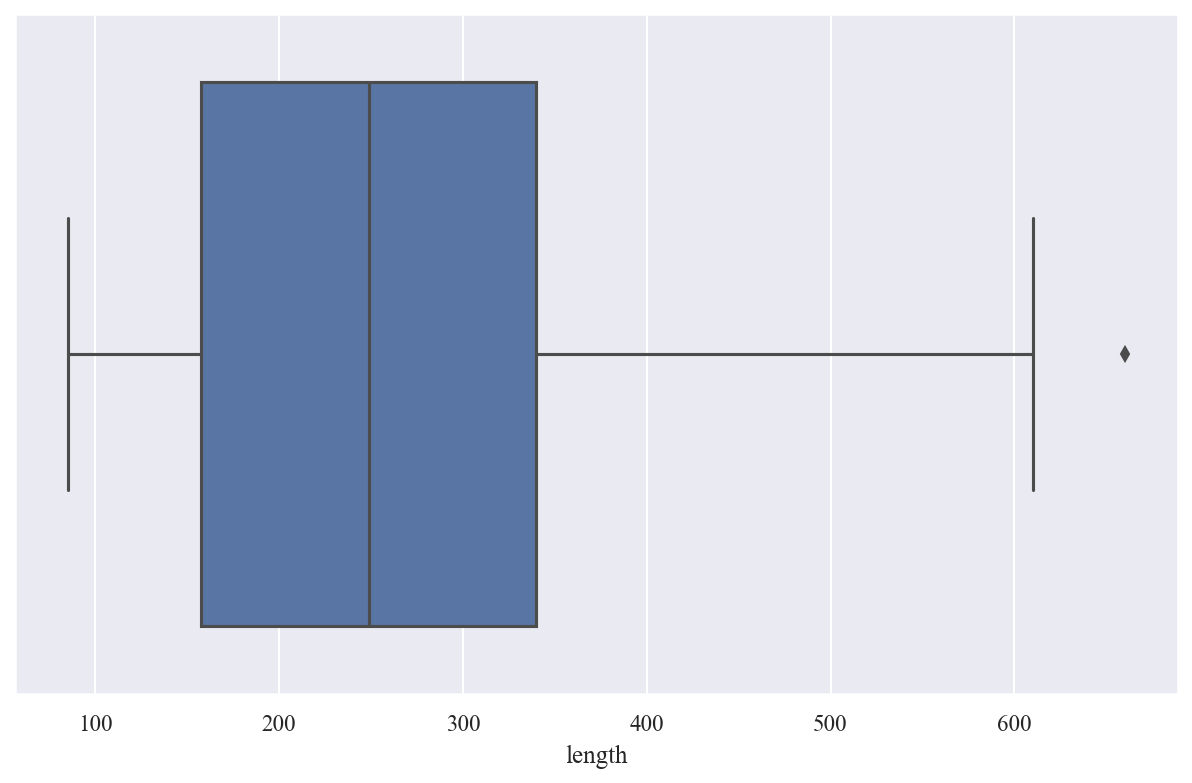

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_eq_sample, x='length')

/Users/TAKEI/miniforge3/envs/mypython/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_entry_in_cluster'>

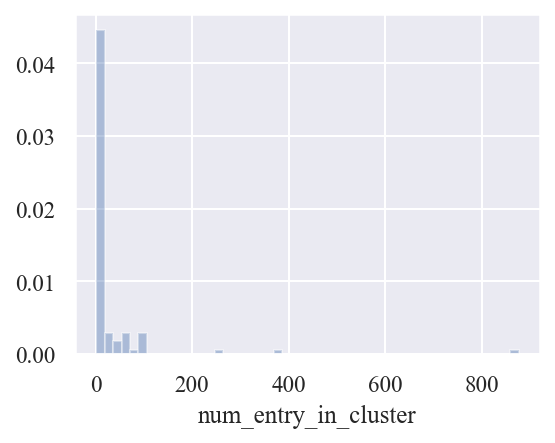

In [19]:
plt.figure(figsize=(4, 3))
sns.distplot(df_eq_sample['num_entry_in_cluster'], kde=False, norm_hist=True)

In [20]:
# sort by resolution and select top
df_res_top = df.sort_values(by='resolution').head(target_num)
df_res_top

,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2,num_sequence_in_cluster_included_AF2
164,6S2M_A,0.720,2019-08-28T00:00:00Z,>6s2m_A mol:protein length:133 Myelin P2 protein,GMSNKFLGTWKLVSSENFDDYMKALGVGLATRKLGNLAKPTVIISK...,133,319,67,True,252
98,7KR0_A,0.770,2020-12-09T00:00:00Z,>7kr0_A mol:protein length:173 Non-structural...,SNAGEVNSFSGYLKLTDNVYIKNADIVEEAKKVKPTVVVNAANVYL...,173,548,532,True,16
73,6L27_A,0.770,2020-04-01T00:00:00Z,>6l27_A mol:protein length:229 Green fluoresc...,MGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIS...,229,714,148,True,566
112,5YCE_A,0.770,2018-09-19T00:00:00Z,>5yce_A mol:protein length:154 Myoglobin,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,496,74,True,422
903,7A5M_A,0.780,2020-10-07T00:00:00Z,>7a5m_A mol:protein length:113 Protein enable...,GSMSEQSICQARAAVMVYDDANKKWVPAGGSTGFSRVHIYHHTGNN...,113,51,10,True,41
...,...,...,...,...,...,...,...,...,...,...
3111,6N9H_A,1.039,2019-12-18T00:00:00Z,>6n9h_A mol:protein length:80 amantadine-bind...,GSHMGDAQDKLKYLVKQLERALRELKKSLDELERSLEELEKNPSED...,80,8,1,True,7
3956,7BGG_A,1.040,2021-09-22T00:00:00Z,>7bgg_A mol:protein length:245 heterocyclic t...,MGSSHHHHHHHHENLYFQSAGTESLDLEFESAYRGESVAFGEGVRP...,245,4,4,False,0
1075,6KGI_B,1.040,2020-01-22T00:00:00Z,>6kgi_B mol:protein length:86 E3 ubiquitin-pr...,RLGSGDVHKHTGRNCGRKFKIGEPLYRCHECGCDDTCVLCIHCFNP...,86,41,2,True,39
1673,6MM2_A,1.040,2019-09-18T00:00:00Z,>6mm2_A mol:protein length:104 Carbon regulat...,SSQQVWKLVIITEEILLKKVSKIIKEAGASGYTVLAAAGEGSRNVR...,104,23,23,False,0


<AxesSubplot:xlabel='length'>

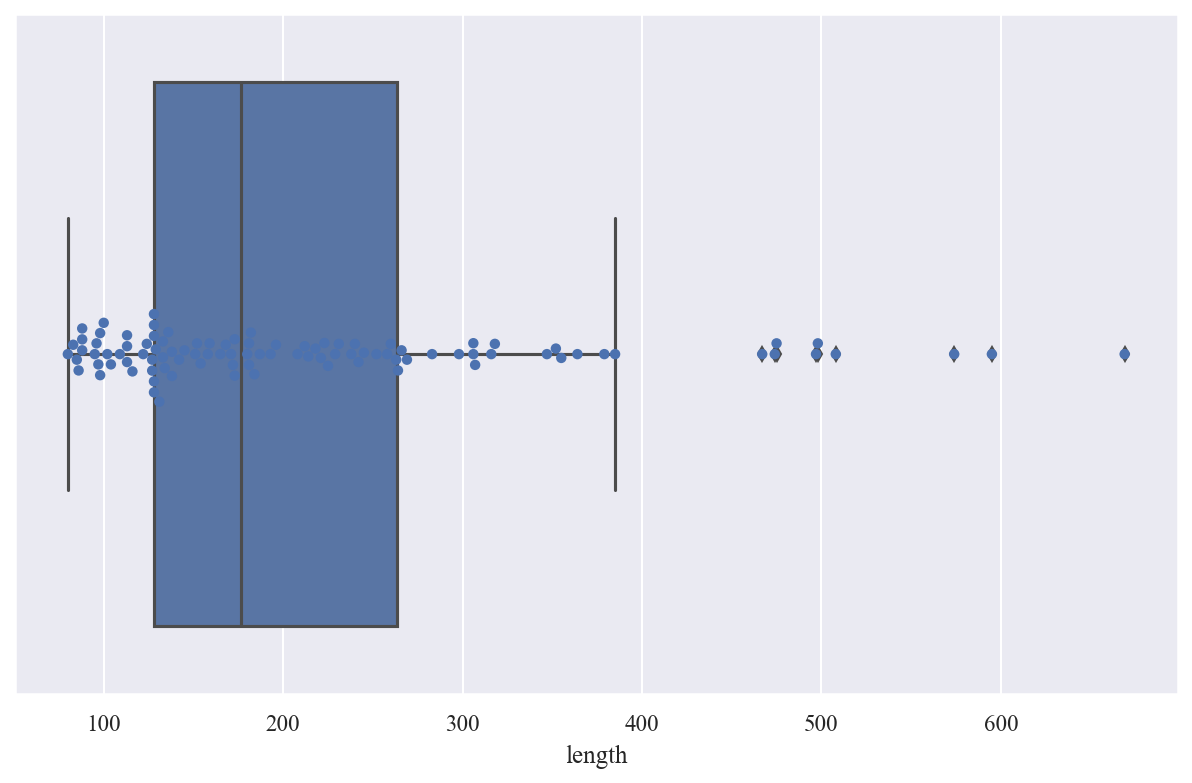

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_res_top, x='length')
sns.swarmplot(data=df_res_top, x='length')

<AxesSubplot:xlabel='is_similar_AF2', ylabel='count'>

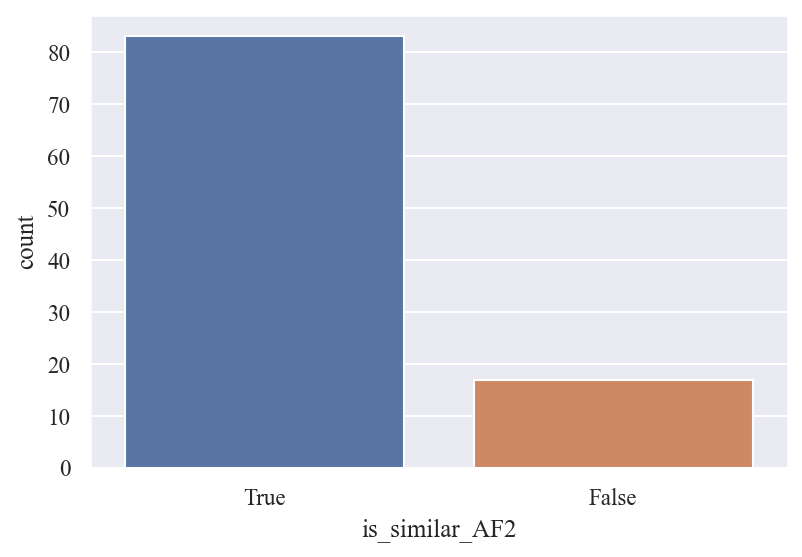

In [22]:
sns.countplot(data=df_res_top, x='is_similar_AF2')